In [1]:
#Some imports:
#%pip install numpy
#%pip install scipy
#%pip install matplotlib
import sys
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

#import changepoint classes:
from data import Data
from changepoint_model import ChangepointModel
from regime_model import RegimeModel
from multinomial_dirichlet import MultinomialDirichlet
from normal_normal_inverse_gamma import NormalNIG
from normal_linear_model import NormalLinearModel
from uniform_pareto import UniformPareto
from probability_model import ProbabilityModel
from poisson_gamma import PoissonGamma
from exponential_gamma import ExponentialGamma
from simulate_changepoint_data import *

In [2]:
#Simulate changepoint data
n=1000
lambda_cps=.01
seed=0
probability_models=[]
probability_models.append(MultinomialDirichlet(k=np.array([3,5],dtype=int),alpha=1))
probability_models.append(NormalNIG(p=3))
probability_models.append(NormalLinearModel(p=4))
tau,regimes,inclusion_vectors,xys=simulate(n,probability_models,seed=seed,lambda_cps=lambda_cps)

In [3]:
# show the sizes of the x (time points) and y (data values) matrices generated for each probability model
for _ in range(len(xys)):
    x,y=xys[_].x,xys[_].y
    print(x.shape,y.shape)

(1000,) (2, 1000)
(1000,) (3, 1000)
(1000,) (4, 1000)


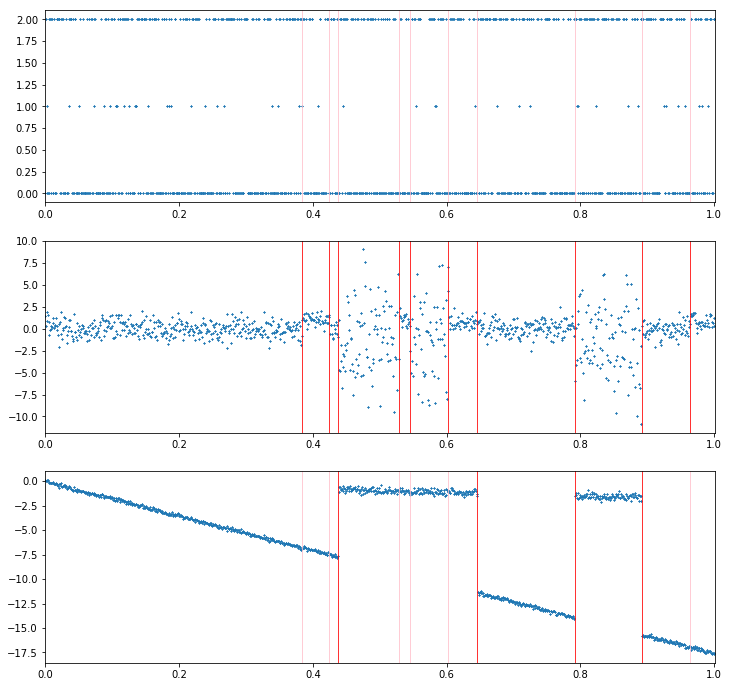

In [4]:
# Plot the data which have been generated.
# For each probabilty model which may be multivaraite, plot dimension corresponding to plot_dim
plot_data(tau,regimes,inclusion_vectors,xys,plot_dim=0)

In [5]:
for i in range(len(probability_models)):
    probability_models[i].add_data(xys[i])

In [6]:
cpm=ChangepointModel(probability_models,infer_regimes=True,disallow_successive_regimes=True,spike_regimes=False)#,pg])
cpm.mcmc(5000,seed=10,hill_climbing=True)
estimated_cps,estimated_regimes,estimated_inclusion_vectors=cpm.get_effective_changepoint_locations()

-inf:0	0.00618086371510336:1	0.03619848166465581:2	0.11159945107393968:3	0.23705959637243781:4	0.38625947659523513:5	0.4384252873542088:6	0.6044921403093578:5	0.6466020107737173:7	0.7911537170068362:8	0.7923211112301015:6	0.8877715388383685:7	0.9628407345858414:5
0:True,True,True	1:True,True,True	2:True,False,True	3:False,False,True	4:False,False,True	5:False,True,False	6:True,True,True	7:False,True,True	8:True,True,True
Final posterior=-14033.221765144242
add_changepoint:	17/1032	1.6472868217054266%
delete_changepoint:	5/1030	0.48543689320388345%
change_regime:	6/1009	0.5946481665014867%
change_regime_inclusion:	29/999	2.902902902902903%
shift_changepoint:	70/930	7.526881720430108%
E[#Changepoints] = 11.018


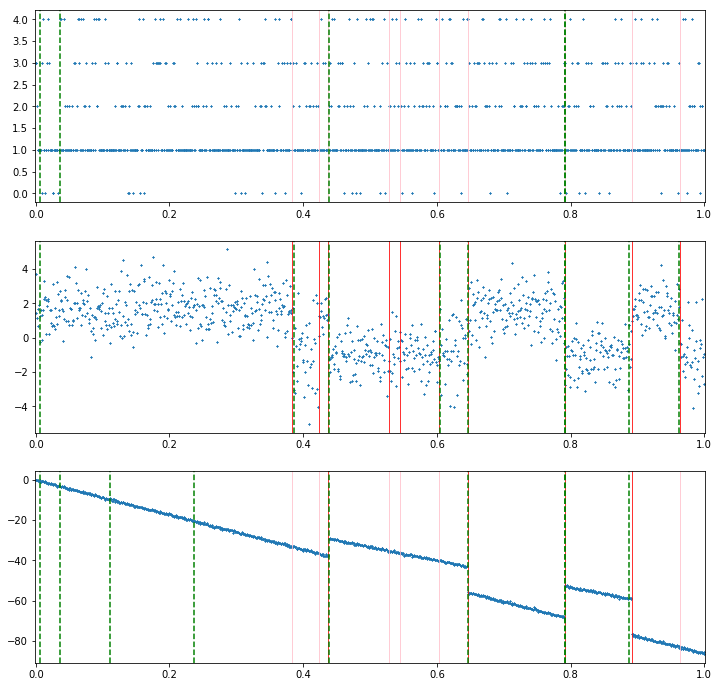

In [7]:
# Plot data with inferred changepoints
plot_data(tau,regimes,inclusion_vectors,xys,estimated_cps=estimated_cps,estimated_regimes=estimated_regimes,estimated_inclusion_vectors=estimated_inclusion_vectors,plot_dim=-1)

In [8]:
#Another example, using text:
with open("text.txt") as f:
    head=[next(f).strip() for _ in range(13)]
print("\n".join(head))

It was the best of times,
it was the worst of times,
it was the age of wisdom,
it was the age of foolishness,
it was the epoch of belief,
it was the epoch of incredulity,
it was the season of Light,
it was the season of Darkness,
it was the spring of hope,
it was the winter of despair,
we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way— in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.
There were a king with a large jaw and a queen with a plain face, on the throne of England; there were a king with a large jaw and a queen with a fair face, on the throne of France. In both countries it was clearer than crystal to the lords of the State preserves of loaves and fishes, that things in general were settled for ever.
It was the year of Our Lord one thousand seven hundred 

In [9]:
probability_models2=[MultinomialDirichlet(Data.from_arguments("text.txt",y_textfile=True))]
cpm=ChangepointModel(probability_models2,infer_regimes=True,disallow_successive_regimes=True,spike_regimes=False)#,pg])
cpm.mcmc(5000,seed=10,hill_climbing=True)
estimated_cps,estimated_regimes,estimated_inclusion_vectors=cpm.get_effective_changepoint_locations()

-inf:0	9.106634065349153:1	10.36414248407689:2	11.483216276106553:3	12.747193312500833:4	13.806294260815944:5
0:True	1:True	2:True	3:True	4:True	5:True
Final posterior=-5983.936167335971
shift_changepoint:	209/1277	16.366483946750197%
change_regime:	0/1277	0.0%
delete_changepoint:	0/1255	0.0%
add_changepoint:	5/1191	0.41981528127623846%
E[#Changepoints] = 4.0496


In [10]:
print("Changepoints at lines: "+" ".join(map(str,[int(np.ceil(cp)) for cp in estimated_cps])))

Changepoints at lines: 10 11 12 13 14
